In [2]:
# %pip install opendatasets
# %pip install prophet

import opendatasets as od
import pandas as pd
import numpy as np

# od.download('https://www.kaggle.com/datasets/arjuntejaswi/plant-village')

In [ ]:
import tensorboard

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [5]:
directory = 'plant-village'
df = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2152 files belonging to 3 classes.


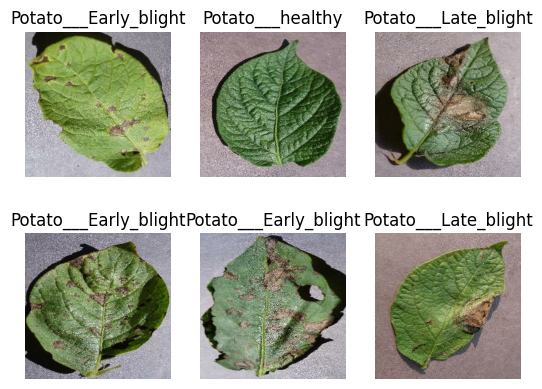

In [60]:
for images, labels in df.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(df.class_names[labels[i]])
        plt.axis("off")

In [62]:
len(df)

68

In [63]:
# tf.take(10) will take 10 image sets from the dataset
# tf.skip(10) will skip 10 image sets from the dataset
# doen't need to shuffle the dataset as it is already shuffled

train_ds = df.take(54)
test_ds = df.skip(54)

val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [64]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


In [65]:
# cache the dataset in the memory to improve performance
train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>